# Подготовка

In [ ]:
# Импорт библиотек

%matplotlib inline
import re # Регулярные выражения
import pandas as pd # Импортируем библиотеку обработки и анализа данных pandas
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import datetime # Импортируем модуль datetime для обработки данных в формете даты
import numpy as np # Импортируем библиотеку numpy
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
data = pd.read_csv('speed_data_data.csv', delimiter=',') # Импортируем базу данных

# Анализ данных

In [ ]:
data.count() # Считаем количество ненулевых элементов в каждом столбце

gender    8378
age       8283
income    4279
goal      8299
career    8289
dec       8378
attr      8176
sinc      8101
intel     8082
fun       8028
amb       7666
shar      7311
like      8138
prob      8069
met       8003
dtype: int64

<Axes: ylabel='Density'>

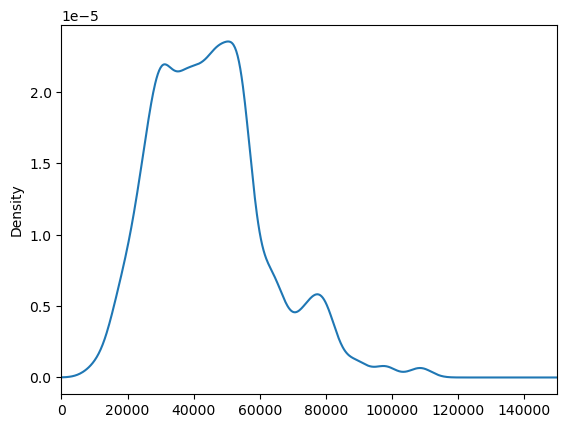

In [ ]:
data['income'].plot(kind='kde', xlim=[0, 150000]) # Смотрим на плотность распределения зарплаты

# Парсинг данных

In [ ]:

# Заполним пропуски в столбце 'Age' модой
data['age'] = data['age'].fillna(data['age'].mode()[0])
data['income'] = data['income'].fillna(data['income'].mode()[0])
data['attr'] = data['attr'].fillna(data['attr'].mode()[0])
data['sinc'] = data['sinc'].fillna(data['sinc'].mode()[0])
data['intel'] = data['intel'].fillna(data['intel'].mode()[0])
data['fun'] = data['fun'].fillna(data['fun'].mode()[0])
data['shar'] = data['shar'].fillna(data['shar'].mode()[0])
data['like'] = data['like'].fillna(data['like'].mode()[0])
data['prob'] = data['prob'].fillna(data['prob'].mode()[0])
data['amb'] = data['amb'].fillna(data['amb'].mode()[0])
data = data.drop('met', axis=1)
data = data.drop('career', axis=1)
data = data.drop('goal', axis=1)
data.count() # Считаем количество ненулевых элементов в каждом столбце повторно после заполнения

In [ ]:
data.count() # Считаем количество ненулевых элементов в каждом столбце повторно после заполнения

gender    8378
age       8378
income    8378
dec       8378
attr      8378
sinc      8378
intel     8378
fun       8378
amb       8378
shar      8378
like      8378
prob      8378
dtype: int64

# Обучение модели

In [ ]:
# Разделение на данные для обучения и целевую переменную

from sklearn.model_selection import train_test_split

X = data.drop("prob", axis=1)
y = data["prob"]

# Разделение на обучающую и тестовую выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Посчитать корреляцию X_train и X_test

data.corr()

,gender,age,income,dec,attr,sinc,intel,fun,amb,shar,like,prob
gender,1.000000,0.069401,0.086773,0.110232,0.136951,0.043433,-0.049623,0.059225,-0.093316,0.031214,0.073806,-0.003512
age,0.069401,1.000000,-0.019377,0.015322,0.040143,0.014527,0.017622,0.006246,-0.021145,0.013324,0.028120,-0.012416
income,0.086773,-0.019377,1.000000,0.045600,-0.005254,-0.005400,-0.049044,-0.010507,-0.037162,0.034494,0.005736,0.046268
dec,0.110232,0.015322,0.045600,1.000000,0.483922,0.197248,0.205439,0.400246,0.174312,0.380117,0.496417,0.308108
attr,0.136951,0.040143,-0.005254,0.483922,1.000000,0.395578,0.385303,0.578216,0.346303,0.453136,0.661536,0.258493
sinc,0.043433,0.014527,-0.005400,0.197248,0.395578,1.000000,0.653595,0.488212,0.443353,0.372100,0.514799,0.311756
intel,-0.049623,0.017622,-0.049044,0.205439,0.385303,0.653595,1.000000,0.489817,0.609719,0.374078,0.503483,0.256812
fun,0.059225,0.006246,-0.010507,0.400246,0.578216,0.488212,0.489817,1.000000,0.475232,0.584098,0.682776,0.370104
amb,-0.093316,-0.021145,-0.037162,0.174312,0.346303,0.443353,0.609719,0.475232,1.000000,0.405942,0.427742,0.260576
shar,0.031214,0.013324,0.034494,0.380117,0.453136,0.372100,0.374078,0.584098,0.405942,1.000000,0.622107,0.444757


In [ ]:
# Градиентный бустинг

model = RandomForestRegressor(n_estimators = 10, max_depth = 2, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred))

MSE (средняя квадратичная ошибка): 3.3645479957676234
R^2 (Корреляционный коэффициент): 0.22855597093654845
RMSE (Корневая средняя квадратичная ошибка): 1.8342704260189182
MAE (Средняя абсолютная ошибка): 1.4036797186690786
MAPE (Средняя абсолютная процентная ошибка): 98267703632878.45


In [ ]:
# Рандомный лес

from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred3))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred3))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred3)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred3))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred3))

MSE (средняя квадратичная ошибка): 2.928776989537878
R^2 (Корреляционный коэффициент): 0.3284721977871662
RMSE (Корневая средняя квадратичная ошибка): 1.7113669944047296
MAE (Средняя абсолютная ошибка): 1.2836115377263946
MAPE (Средняя абсолютная процентная ошибка): 84153628478625.39


In [ ]:
# Дерево решений

from sklearn.tree import DecisionTreeRegressor

model4 = DecisionTreeRegressor(random_state=42)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred4))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred4))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred4)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred4))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred4))

MSE (средняя квадратичная ошибка): 5.536496950411032
R^2 (Корреляционный коэффициент): -0.26944169608974367
RMSE (Корневая средняя квадратичная ошибка): 2.3529761899371255
MAE (Средняя абсолютная ошибка): 1.671599045346062
MAPE (Средняя абсолютная процентная ошибка): 72552022636637.36


In [ ]:
# Градиентный бустинг

model2 = GradientBoostingRegressor(random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred2))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred2))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred2)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred2))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred2))

MSE (средняя квадратичная ошибка): 2.9905542842878448
R^2 (Корреляционный коэффициент): 0.3143075238914438
RMSE (Корневая средняя квадратичная ошибка): 1.7293219145919145
MAE (Средняя абсолютная ошибка): 1.3111241288977453
MAPE (Средняя абсолютная процентная ошибка): 86575799173592.42


In [ ]:
# К-ближайших соседей

from sklearn.neighbors import KNeighborsRegressor
model6 = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)  # n_neighbors = 5 - число соседей
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred6))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred6))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred6)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred6))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred6))

MSE (средняя квадратичная ошибка): 2.7925596658711216
R^2 (Корреляционный коэффициент): 0.3597049342884471
RMSE (Корневая средняя квадратичная ошибка): 1.6710953491261717
MAE (Средняя абсолютная ошибка): 1.2327565632458233
MAPE (Средняя абсолютная процентная ошибка): 79538513705350.42


In [ ]:
# Линейная регрессия

from sklearn.linear_model import LinearRegression
model5 = LinearRegression(n_jobs=-1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred5))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred5))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred5)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred5))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred5))

MSE (средняя квадратичная ошибка): 3.266626384399405
R^2 (Корреляционный коэффициент): 0.251008033591416
RMSE (Корневая средняя квадратичная ошибка): 1.8073810844421838
MAE (Средняя абсолютная ошибка): 1.3801455702202847
MAPE (Средняя абсолютная процентная ошибка): 83256726449986.52


In [ ]:
# Градиентный бустинг с использованием CatBoost

import catboost as cb
modelcb = cb.CatBoostRegressor(task_type='GPU',
                              iterations=100,
                              learning_rate=0.05,
                              depth=16,
                              loss_function='RMSE')

loss_function='RMSE'

modelcb.fit(X_train, y_train)

modelcb.save_model('my_model.cbm')
modelcb.load_model('my_model.cbm')
y_predcb = modelcb.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_predcb))
print("R^2:", r2_score(y_test, y_predcb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predcb)))
print("MAE:", mean_absolute_error(y_test, y_predcb))
print("MAPE:", mean_absolute_percentage_error(y_test, y_predcb))

0:	learn: 2.0579750	total: 179ms	remaining: 17.7s
1:	learn: 2.0272810	total: 324ms	remaining: 15.9s
2:	learn: 1.9976688	total: 463ms	remaining: 15s
3:	learn: 1.9692267	total: 599ms	remaining: 14.4s
4:	learn: 1.9421222	total: 737ms	remaining: 14s
5:	learn: 1.9164849	total: 873ms	remaining: 13.7s
6:	learn: 1.8911388	total: 1.01s	remaining: 13.4s
7:	learn: 1.8687190	total: 1.14s	remaining: 13.2s
8:	learn: 1.8454293	total: 1.28s	remaining: 13s
9:	learn: 1.8231914	total: 1.42s	remaining: 12.8s
10:	learn: 1.8026925	total: 1.56s	remaining: 12.6s
11:	learn: 1.7823234	total: 1.69s	remaining: 12.4s
12:	learn: 1.7617893	total: 1.83s	remaining: 12.2s
13:	learn: 1.7424057	total: 1.96s	remaining: 12.1s
14:	learn: 1.7240812	total: 2.1s	remaining: 11.9s
15:	learn: 1.7055764	total: 2.24s	remaining: 11.7s
16:	learn: 1.6878688	total: 2.39s	remaining: 11.7s
17:	learn: 1.6709587	total: 2.53s	remaining: 11.5s
18:	learn: 1.6560652	total: 2.67s	remaining: 11.4s
19:	learn: 1.6398371	total: 2.81s	remaining: 11.

In [ ]:
# Создание нейронной сети на основе TensorFlow

import pandas as pd
import tensorflow as tf

# Определение модели
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Компиляция модели
model7.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
model7.fit(X_train, y_train, epochs=100)

# Оценка модели
loss = model7.evaluate(X_test, y_test)
print('Loss:', loss)

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 675877.5000
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6771
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2905
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4802
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4293
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5199
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5659
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2687
Epoch 9/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1412
Epoch 10/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6388
Epoch 11/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.7299
Epoch 12/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.3315
Epoch 13/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4493
Epoch 14/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2067
Epoch 15/100
210/210 ━━━━━━━━━━━━━

# Подбор лучших параметров модели

##### Т.к. лучший результат был показан у модели К-ближайших соседей из sklearn, будем подбирать параметры у этой модели

Будем использовать модель Ridge т.к. она является расширением модели и поддерживает сетку параметров

In [ ]:
from sklearn.model_selection import GridSearchCV

# Создание сетки параметров для модели
param_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10],
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 500],
    'positive': [True, False],
    'random_state': [None, 0, 10, 42],
    'solver': ['auto', 'lsqr', 'sag'],
    'tol': [1e-3, 1e-4, 1e-5]
}

from sklearn.linear_model import Ridge

# Инициализация модели
modelnew = Ridge()
grid_search = GridSearchCV(estimator=modelnew, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Определение лучших параметров
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Создание новой модели с лучшими параметрами
modelideal = Ridge(**best_params)

# Обучение модели на обучающем наборе данных
modelideal.fit(X_train, y_train)

# Прогнозирование значений на тестовом наборе данных
y_predideal = modelideal.predict(X_test)

# Оценка точности модели
print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_predideal))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_predideal))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_predideal)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_predideal))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_predideal))

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anacond

MSE (средняя квадратичная ошибка): 3.2660877630672673
R^2 (Корреляционный коэффициент): 0.2511315319665697
RMSE (Корневая средняя квадратичная ошибка): 1.807232072277179
MAE (Средняя абсолютная ошибка): 1.3800673564466668
MAPE (Средняя абсолютная процентная ошибка): 83268586613455.64


C:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-3.5028244  -3.24295659 -3.23646029 ... -5.90672051 -5.90672051
 -5.90672051]
  warnings.warn(


# Предсказание на новых данных

In [ ]:
# Прогнозирование на основе новых данных

new_data = pd.DataFrame({
    'gender': [1],
    'age': [24],
    'income': [15000],
    'dec': [0],
    'attr': [7],
    'sinc': [3],
    'intel': [1],
    'fun': [10],
    'amb': [9],
    'shar': [3],
    'like': [7]
})

test_predict = modelideal.predict(new_data)

print('Ождиаемый результат:', test_predict)

new_data

Ождиаемый результат: [4.48014527]


,gender,age,income,dec,attr,sinc,intel,fun,amb,shar,like
0,1,24,15000,0,7,3,1,10,9,3,7
